<a href="https://colab.research.google.com/github/StillWork/colab-2/blob/master/LS_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
!curl -L https://bit.ly/2IeQ8AS -o LS_data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   188  100   188    0     0    195      0 --:--:-- --:--:-- --:--:--   195
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 2476k  100 2476k    0     0   501k      0  0:00:04  0:00:04 --:--:--  935k


In [0]:
df = pd.read_csv('LS_data.csv', parse_dates= ['DateTime'])

In [0]:
df[:3].T

,0,1,2
DateTime,2018-09-03 오전 12:04:20,2018-09-03 오전 12:04:30,2018-09-03 오전 12:04:40
편심률_계측기1(y1),28.4347,28.5676,29.1511
편심률_계측기2(y2),28.776,28.8476,28.8476
도체 예열 온도(x1),95.8,97.3,95.3
압출기 수지온도(x2),1.48207,1.50929,1.46043
압출기 모터RPM(x3),514.1,513.8,514.1
압출기 압력(x4),137.9,138,138.1
압출기 실린더 온도(x5),95.1572,95.0274,94.9458
냉각기 입구 온도(x6),70,70,70.1
냉각기 출구 온도(x7),21.1,21.1,21.4


In [0]:
import matplotlib.pyplot as plt
df.set_index('DateTime', inplace=True)

In [0]:
df.columns

Index(['DateTime', '편심률_계측기1(y1)', '편심률_계측기2(y2)', '도체 예열 온도(x1)',
       '압출기 수지온도(x2)', '압출기 모터RPM(x3)', '압출기 압력(x4)', '압출기 실린더 온도(x5)',
       '냉각기 입구 온도(x6)', '냉각기 출구 온도(x7)', '가교관 온도(x8)', '조장 길이(x9)'],
      dtype='object')

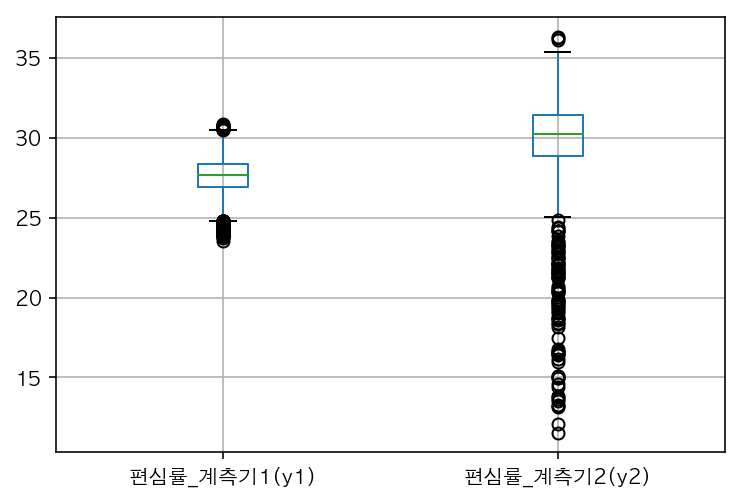

In [0]:
df[['편심률_계측기1(y1)','편심률_계측기2(y2)']].boxplot()

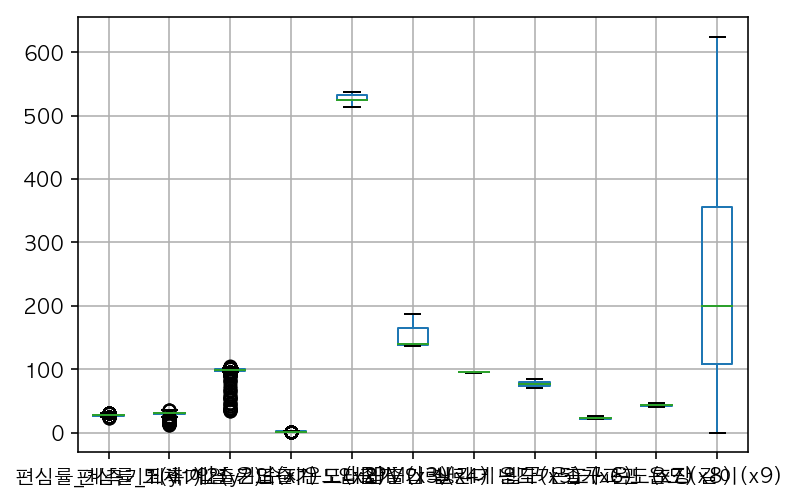

In [0]:
df.boxplot()

In [0]:
import platform
from matplotlib import rc
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

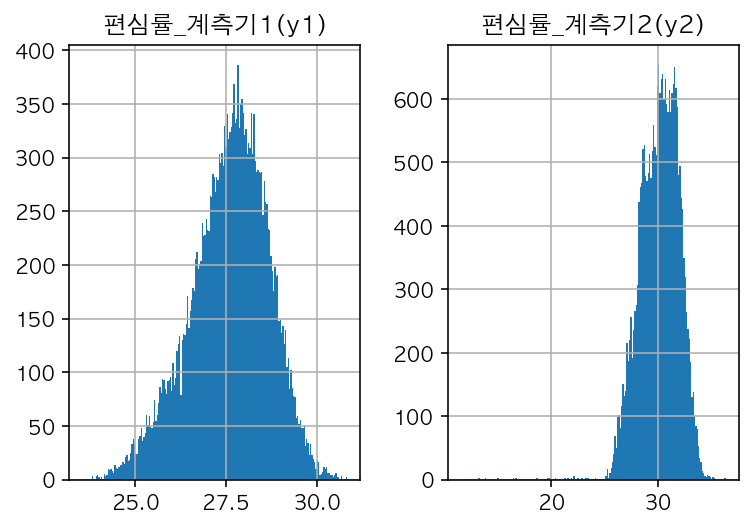

In [0]:
df[['편심률_계측기1(y1)','편심률_계측기2(y2)']].hist(bins=200)
plt.show()

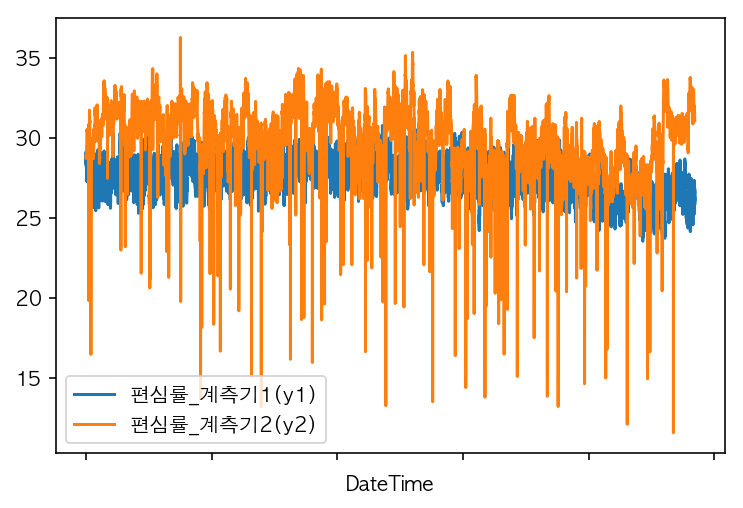

In [0]:
df[['편심률_계측기1(y1)','편심률_계측기2(y2)']][:50000].plot()

In [0]:
df_n = df.dropna(how='any')

In [0]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sc = MinMaxScaler()
df_s =  sc.fit_transform(df_n)

In [0]:
df_n[:3]

,편심률_계측기1(y1),편심률_계측기2(y2),도체 예열 온도(x1),압출기 수지온도(x2),압출기 모터RPM(x3),압출기 압력(x4),압출기 실린더 온도(x5),냉각기 입구 온도(x6),냉각기 출구 온도(x7),가교관 온도(x8),조장 길이(x9)
DateTime,,,,,,,,,,,
2018-09-03 오전 12:04:20,28.434668,28.7760,95.8,1.482066,514.1,137.9,95.1572,70.0,21.1,41.5,104.0
2018-09-03 오전 12:04:30,28.567556,28.8476,97.3,1.509288,513.8,138.0,95.0274,70.0,21.1,41.5,104.0
2018-09-03 오전 12:04:40,29.151079,28.8476,95.3,1.460433,514.1,138.1,94.9458,70.1,21.4,41.6,104.5


In [0]:
df.shape, df_n.shape

((24231, 11), (24228, 11))

numpy.ndarray

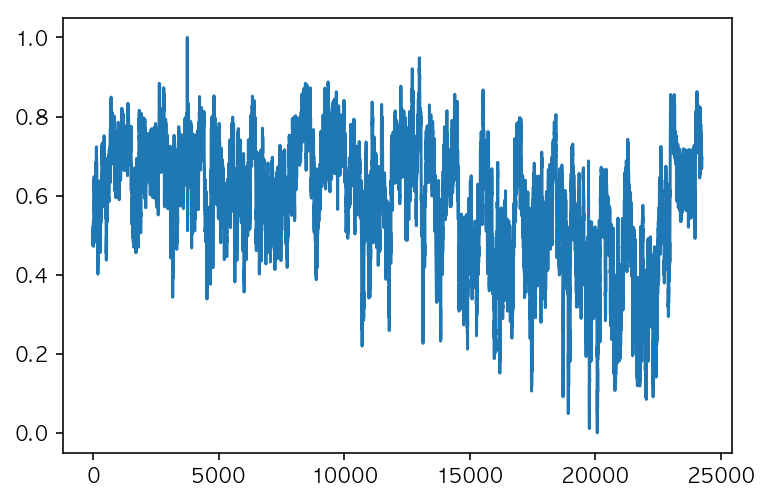

In [0]:
df_new = pd.DataFrame(df_s, columns=df_n.columns)
plt.plot(df_new['압출기 수지온도(x2)'])

In [0]:
type(df_new)

pandas.core.frame.DataFrame

In [0]:
df_new.columns

Index(['편심률_계측기1(y1)', '편심률_계측기2(y2)', '도체 예열 온도(x1)', '압출기 수지온도(x2)',
       '압출기 모터RPM(x3)', '압출기 압력(x4)', '압출기 실린더 온도(x5)', '냉각기 입구 온도(x6)',
       '냉각기 출구 온도(x7)', '가교관 온도(x8)', '조장 길이(x9)'],
      dtype='object')

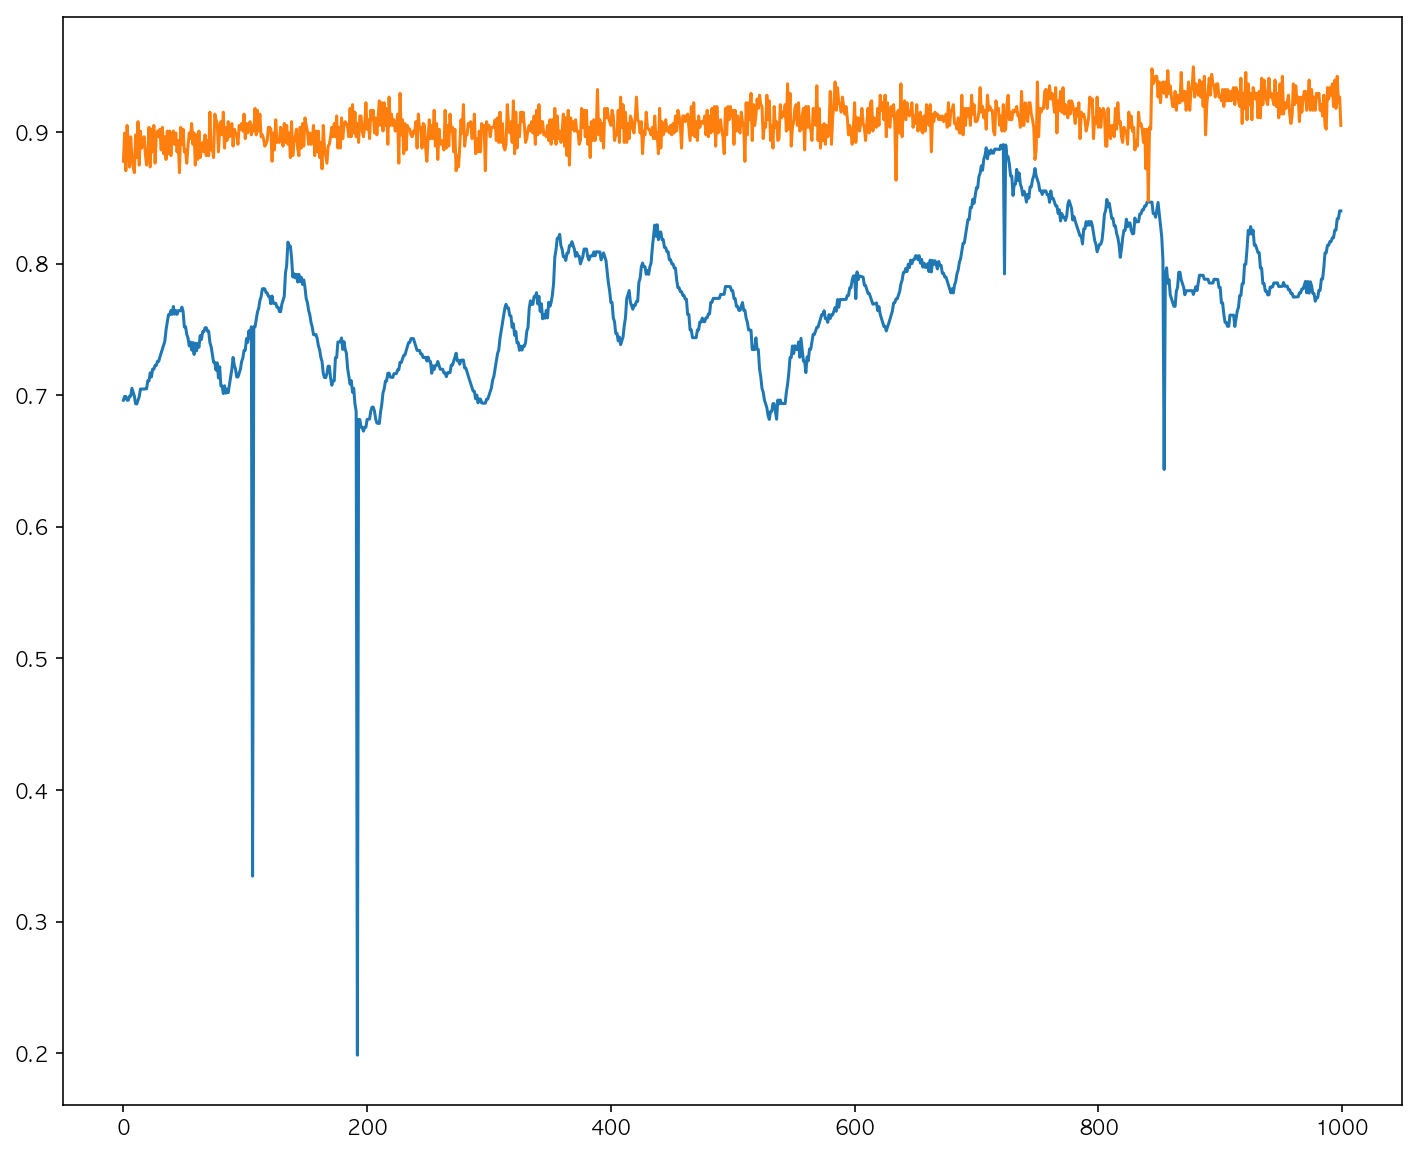

In [0]:
plt.figure(figsize=(12,10))
plt.plot(df_new[['편심률_계측기2(y2)', '도체 예열 온도(x1)']][0:1000])
plt.show()

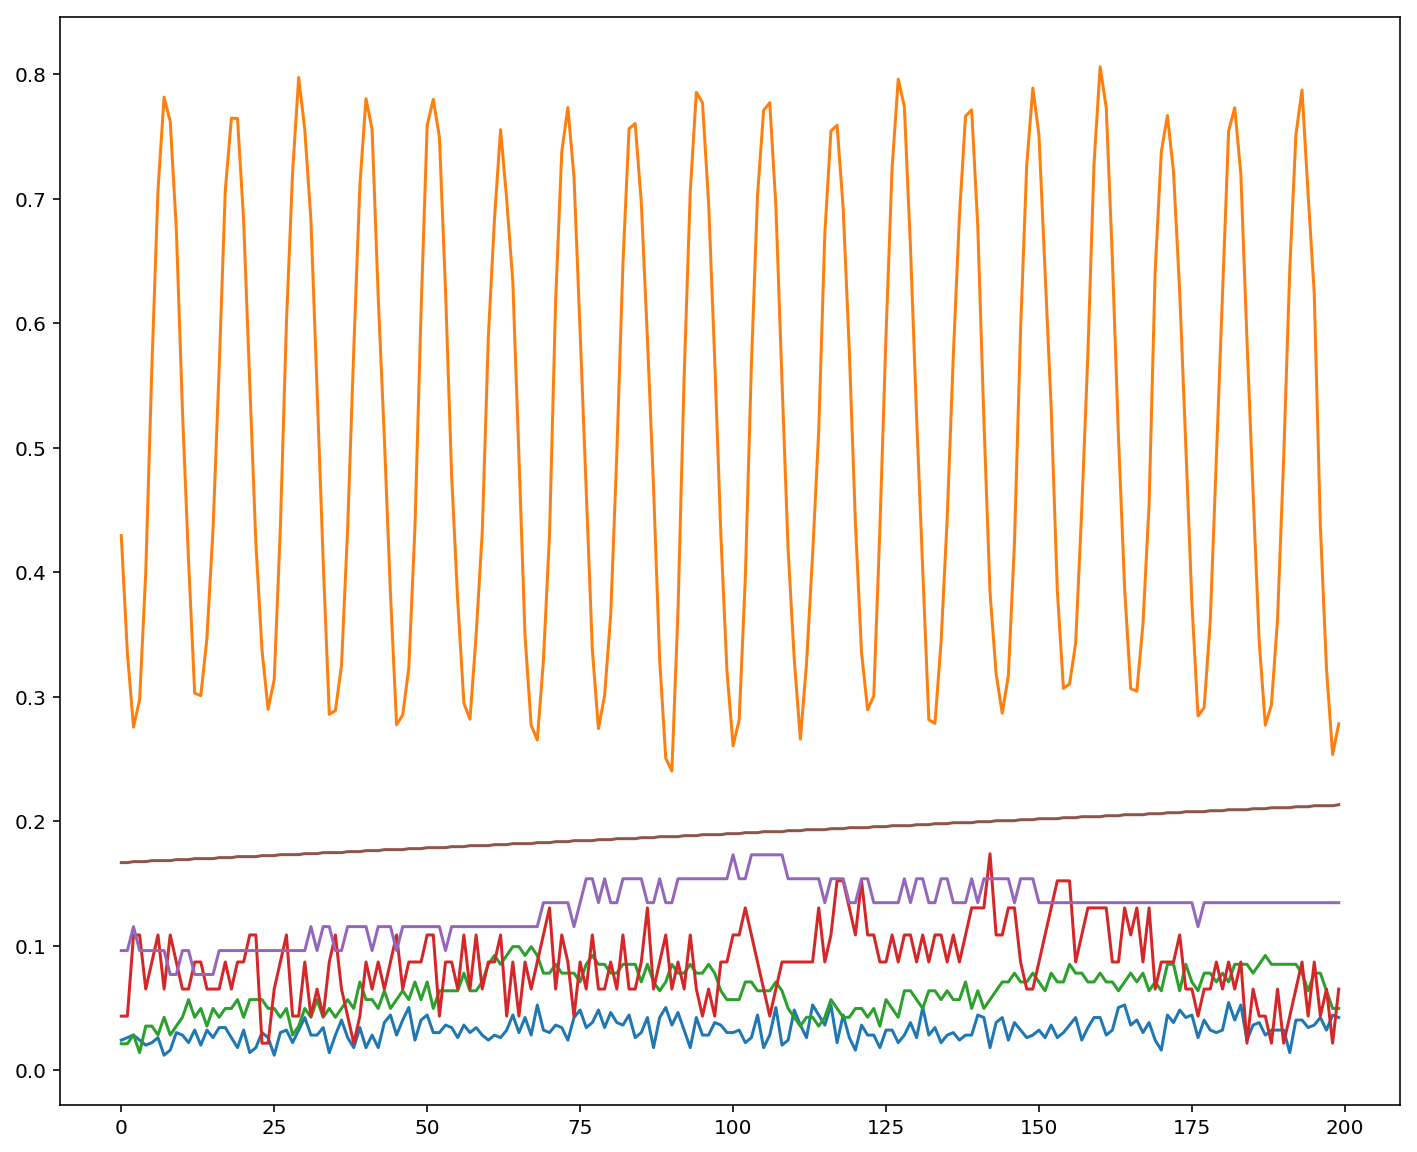

In [0]:
plt.figure(figsize=(12,10))
plt.plot(df_new[['압출기 압력(x4)', '압출기 실린더 온도(x5)', '냉각기 입구 온도(x6)',
       '냉각기 출구 온도(x7)', '가교관 온도(x8)', '조장 길이(x9)']][0:200])
plt.show()

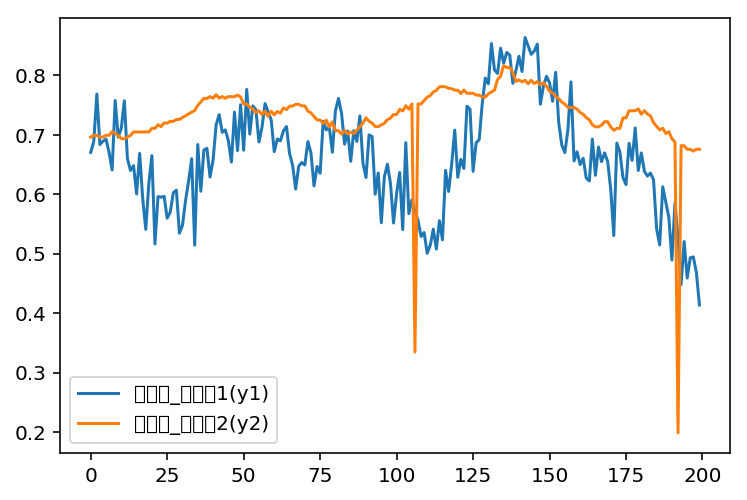

In [0]:
df_new[['편심률_계측기1(y1)','편심률_계측기2(y2)']][:200].plot()